In [1]:
### General analysis package
import numpy as np
import pandas as pd
### Drawing package
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cmx
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42 # Output editable PDF text
### else
import warnings
warnings.filterwarnings("ignore") # Error alert
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' #last_expr

In [2]:
data = pd.read_csv('./Breast cancer/DEG/Pathway_target_gene.csv', index_col=0)
data['GeneRatio'] = [eval(i) for i in data['GeneRatio']]
data['Order'] = range(data.shape[0])
data['logFDR'] = -np.log10(data['p.adjust'])
data.head(2)

,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,Order,logFDR
hsa05205,hsa05205,Proteoglycans in cancer,0.037144,203/7869,2.411400e-18,2.411400e-18,3.985156e-16,2064/4233/3845/3480/3091/6608/7157/1026/998/70...,180,0,17.617731
hsa04390,hsa04390,Hippo signaling pathway,0.028064,154/7869,8.108740e-14,8.108740e-14,6.700380e-12,999/7043/6657/658/595/1499/6788/7042/7046/7048...,136,1,13.091047


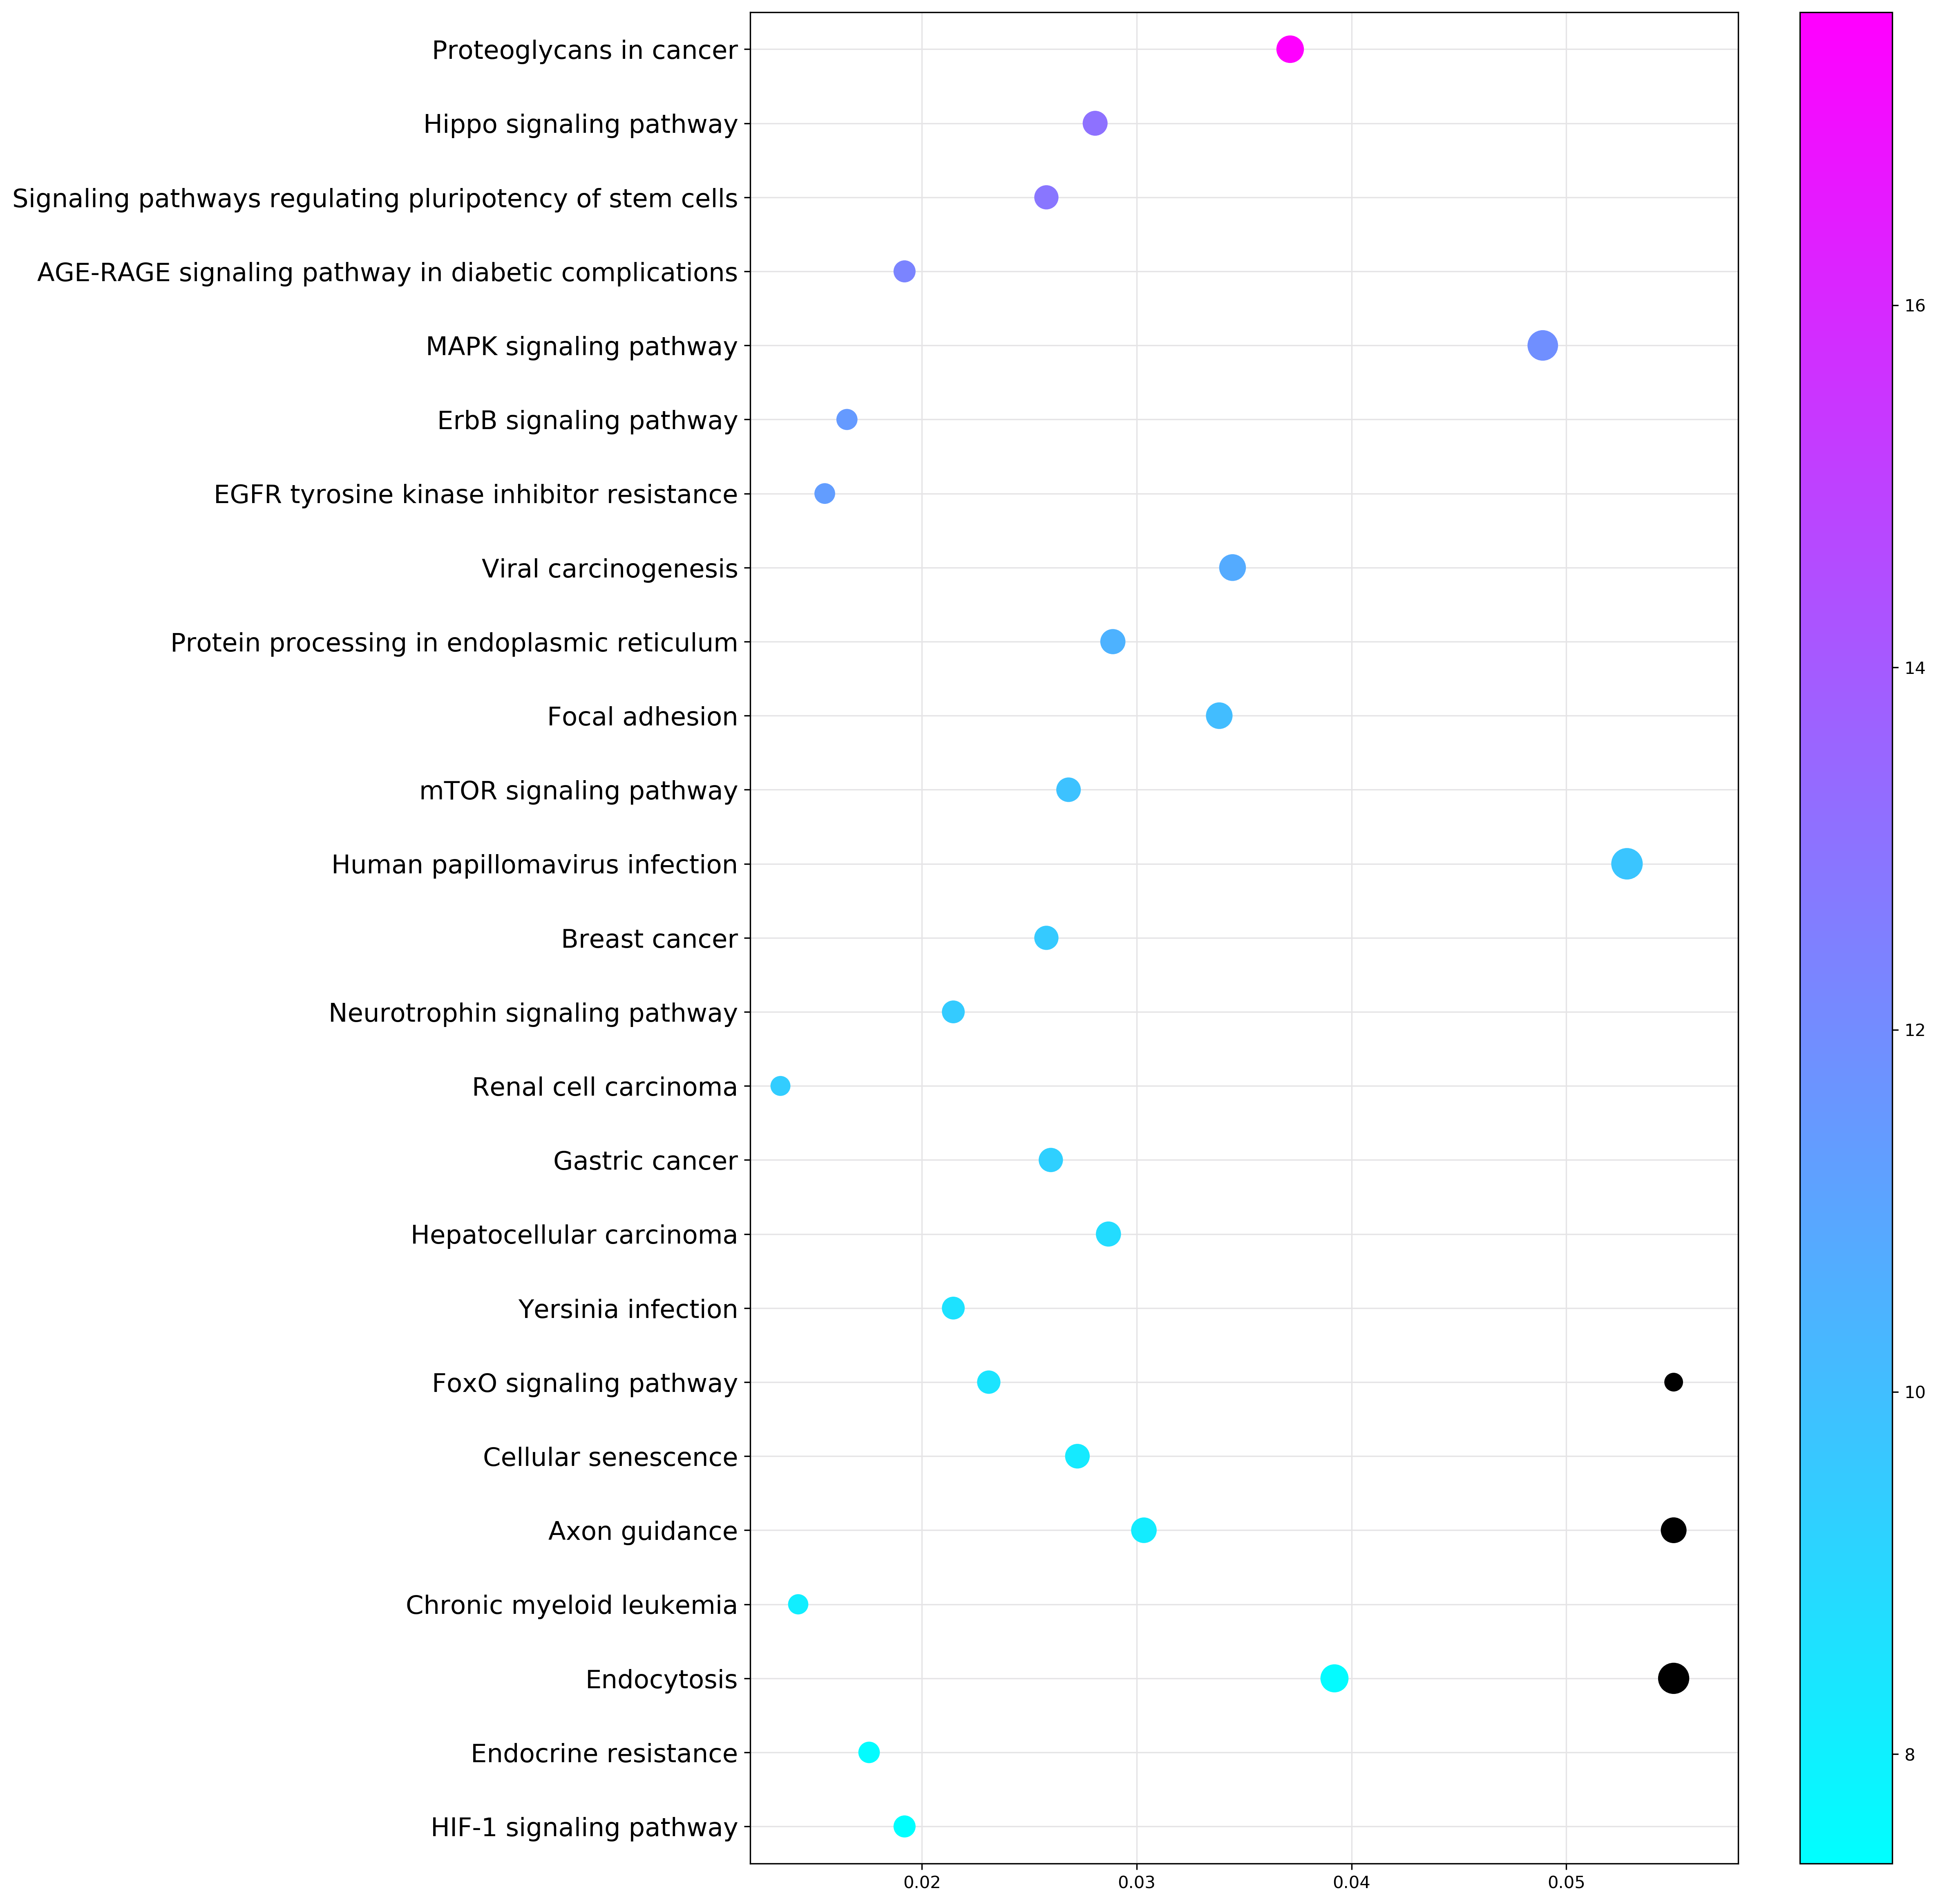

In [3]:
N = 25
fig = plt.figure(figsize=(13, 20), dpi=300)
_ = plt.grid(color='#e5e4e6')

cs = data['logFDR'].values[:N]
cm = plt.get_cmap('cool')
Norm = matplotlib.colors.Normalize(vmin=min(cs), vmax=max(cs))
scalarMap = cmx.ScalarMappable(norm=Norm, cmap=cm)
_ = plt.scatter(data['GeneRatio'][:N], data['Order'][:N], sizes=50+data['Count'], 
                c=scalarMap.to_rgba(cs), zorder=99)

_ = plt.scatter([0.055, 0.055, 0.055], [18, 20, 22], s=[50+50, 50+150, 50+250], c='k', zorder=100)

#_ = sns.scatterplot(x='GeneRatio', y='Order', data=data.iloc[:N, :], size='Count', palette='logFDR')
_ = plt.yticks(range(N), data['Description'][:N], fontsize=15)
_ = plt.ylim([N-0.5, -0.5])
_ = plt.xticks([0.02, 0.03, 0.04, 0.05], [0.02, 0.03, 0.04, 0.05])
_ = plt.xlim([0.012, 0.058])

_ = scalarMap.set_array(cs)
_ = fig.colorbar(scalarMap)
fig.savefig('20220610_Results/1.1. 富集分析top25.pdf', dpi=300)